# Análise Inicial da Planilha

## Estrutura Geral
A planilha contém dados diversos relacionados a um tema específico, ainda a ser detalhado conforme as colunas. Após a leitura e inspeção inicial, foram identificados os seguintes aspectos principais:

### Resumo Inicial dos Dados
- **Quantidade de linhas e colunas**: A estrutura inicial é descrita com o número de entradas (linhas) e variáveis (colunas).
- **Tipos de dados**: As colunas estão divididas entre numéricas, categóricas (texto) e possivelmente dados geográficos (latitude e longitude).

* `texto_limpo` Contém os textos das publicações, já tratados para remoção de elementos desnecessários.
* `tokens` Lista de palavras (tokens) extraídas do texto limpo.
* `comentarios` Número de comentários recebidos por cada publicação.
* `likes` Quantidade de curtidas (likes) em cada publicação.
* `compartilhamentos` Número de vezes que o conteúdo foi compartilhado.
* `repostagens` Quantidade de vezes que o conteúdo foi repostado.
* `total` Soma total de interações (curtidas, comentários, compartilhamentos, etc.).
* `data_hora` Data e hora em que cada publicação foi feita.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Leitura dos dados
file_path = 'nytimes.com.csv'
data = pd.read_csv(file_path)

In [4]:
# 2. Descrição inicial dos dados
print("Resumo inicial dos dados:\n")
print(data.info())
print("\nPrimeiras linhas:\n")
print(data.head())
print("\nDescrição estatística:\n")
print(data.describe())


Resumo inicial dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   texto_limpo        9997 non-null   object
 1   tokens             9997 non-null   object
 2   comentarios        9997 non-null   int64 
 3   likes              9997 non-null   int64 
 4   compartilhamentos  9997 non-null   int64 
 5   repostagens        9997 non-null   int64 
 6   total              9997 non-null   int64 
 7   data_hora          9997 non-null   object
dtypes: int64(5), object(3)
memory usage: 624.9+ KB
None

Primeiras linhas:

                                         texto_limpo  \
0  under threats from president trump that includ...   
1  in nytopinionnytimescom by questioning birthri...   
2  tens of thousands of displaced palestinians we...   
3  listen to the headlines which brings you the b...   
4  mayor eric adams of new york city wil

In [5]:
# 3. Verificando valores ausentes
missing_data = data.isnull().sum()
print("\nValores ausentes por coluna:\n")
print(missing_data)

# 4. Tratamento inicial (Remoção de duplicados)
data = data.drop_duplicates()


Valores ausentes por coluna:

texto_limpo          0
tokens               0
comentarios          0
likes                0
compartilhamentos    0
repostagens          0
total                0
data_hora            0
dtype: int64


In [6]:
# 5. Análise exploratória
# Identificando variáveis categóricas e numéricas
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("\nColunas categóricas:", categorical_columns.tolist())
print("Colunas numéricas:", numerical_columns.tolist())



Colunas categóricas: ['texto_limpo', 'tokens', 'data_hora']
Colunas numéricas: ['comentarios', 'likes', 'compartilhamentos', 'repostagens', 'total']


In [7]:
# Estatísticas básicas dos atributos
print("\nEstatísticas básicas dos atributos numéricos:\n")
print(data[numerical_columns].describe())



Estatísticas básicas dos atributos numéricos:

       comentarios         likes  compartilhamentos  repostagens         total
count  9997.000000   9997.000000        9997.000000  9997.000000   9997.000000
mean     24.011904    194.134840          38.876863    13.727618    270.751225
std      54.025622    498.014288         104.758026    36.410155    640.002136
min       0.000000      0.000000           0.000000     0.000000      3.000000
25%       3.000000     31.000000           6.000000     2.000000     51.000000
50%       9.000000     71.000000          15.000000     5.000000    108.000000
75%      23.000000    176.000000          35.000000    13.000000    256.000000
max    1502.000000  15532.000000        3976.000000  1518.000000  19842.000000


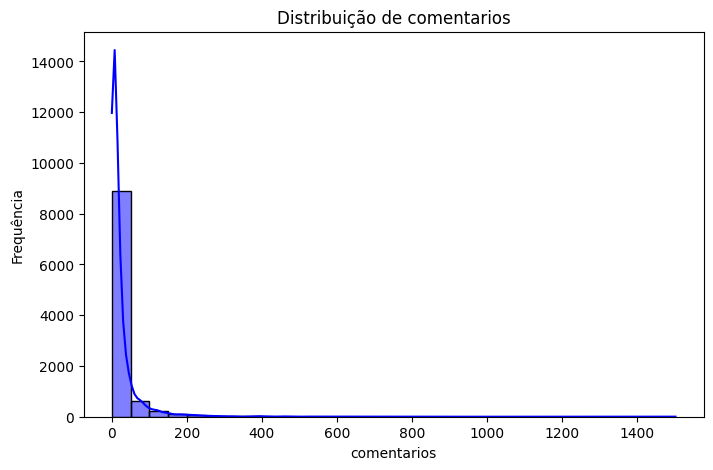

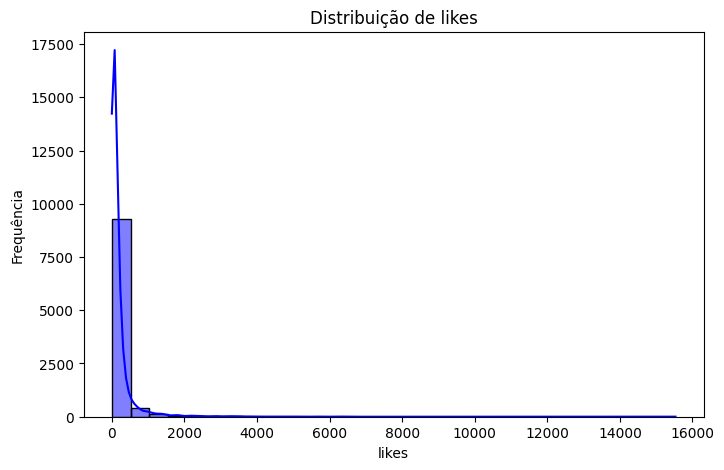

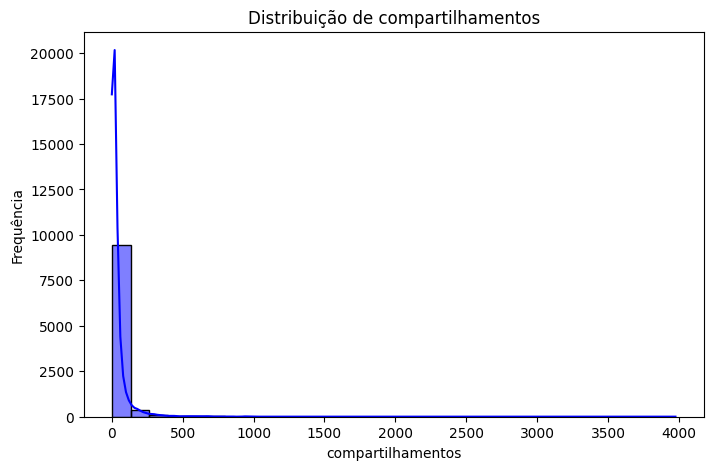

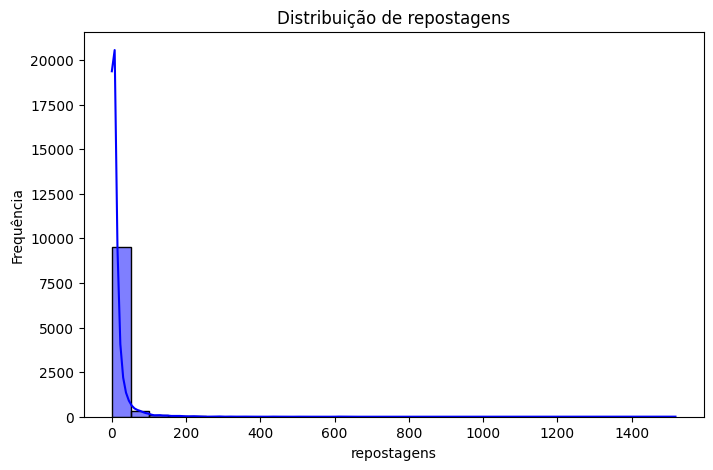

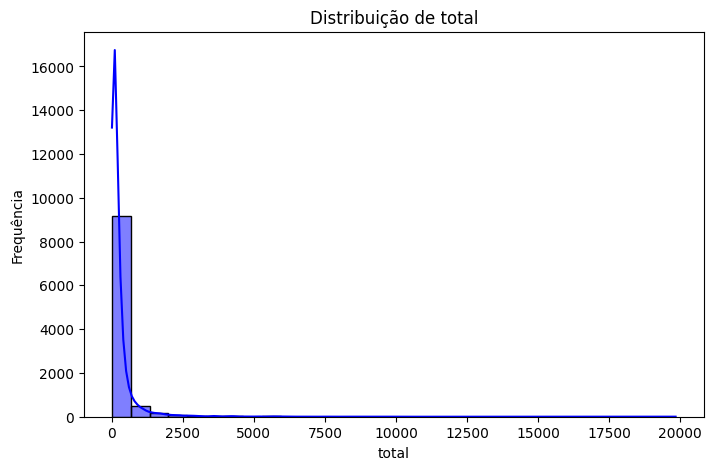

In [8]:
# Análise gráfica: Distribuição dos valores dos atributos numéricos
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

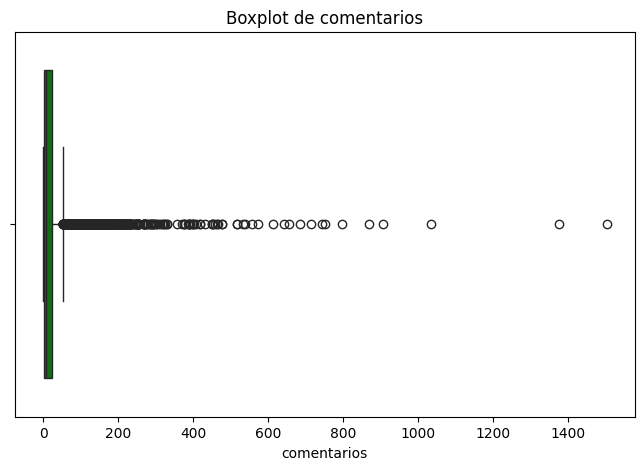

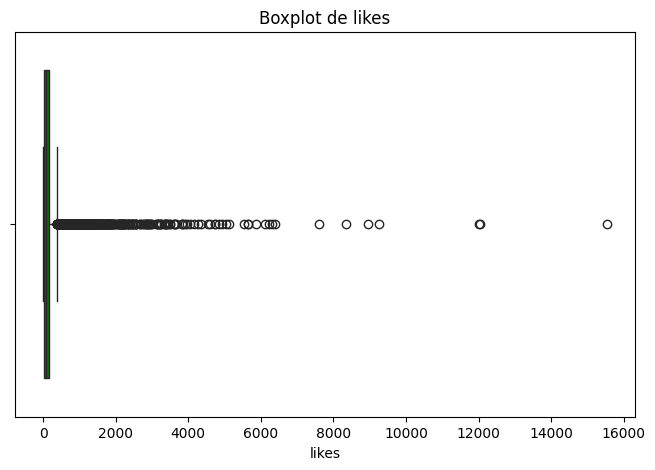

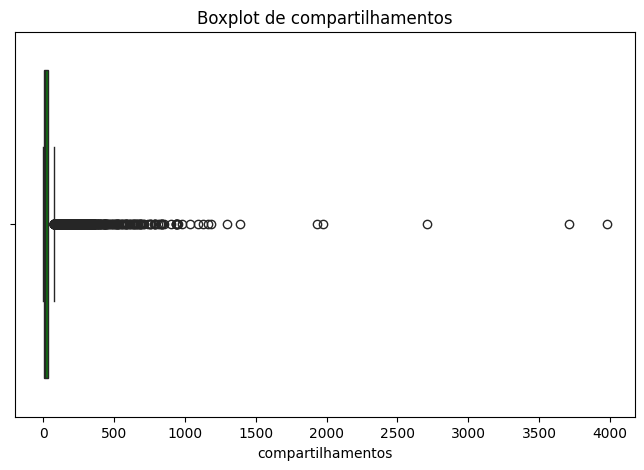

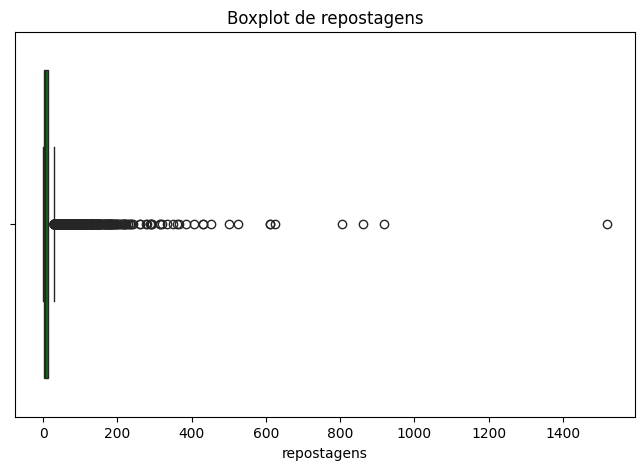

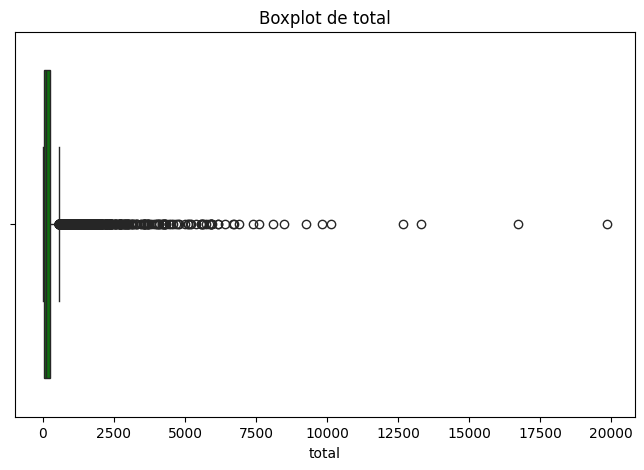

In [9]:
# Análise gráfica: Boxplot para atributos numéricos
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


Matriz de correlação entre atributos numéricos:

                   comentarios     likes  compartilhamentos  repostagens  \
comentarios           1.000000  0.488955           0.516509     0.735353   
likes                 0.488955  1.000000           0.878868     0.432165   
compartilhamentos     0.516509  0.878868           1.000000     0.516431   
repostagens           0.735353  0.432165           0.516431     1.000000   
total                 0.591271  0.987862           0.920551     0.539783   

                      total  
comentarios        0.591271  
likes              0.987862  
compartilhamentos  0.920551  
repostagens        0.539783  
total              1.000000  


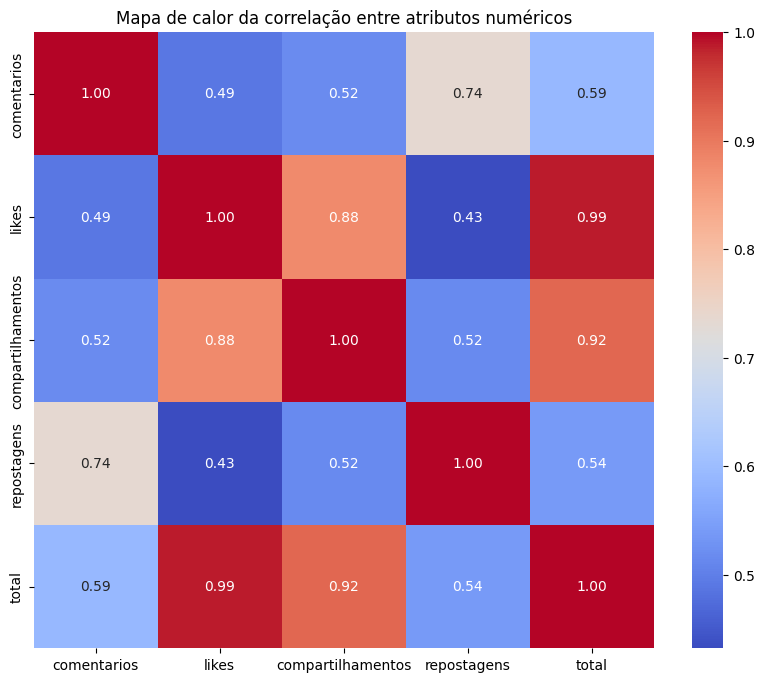

In [10]:

# Correlação entre atributos numéricos
correlation_matrix = data[numerical_columns].corr()
print("\nMatriz de correlação entre atributos numéricos:\n")
print(correlation_matrix)

# Mapa de calor para a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor da correlação entre atributos numéricos')
plt.show()
